In [16]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# load the dataset
file_path = r"C:\Users\TUF\Desktop\mnsit\train.csv"
data = pd.read_csv(file_path)
# print the first five rows
print(data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
# clean the data and get the target column
data = data.dropna()
data = data.drop_duplicates()
X = data.drop(["label"], axis=1)
y = data["label"]
print(f"X.shape is : {X.shape}")
print(f"y.shape is : {y.shape}")


X.shape is : (42000, 784)
y.shape is : (42000,)


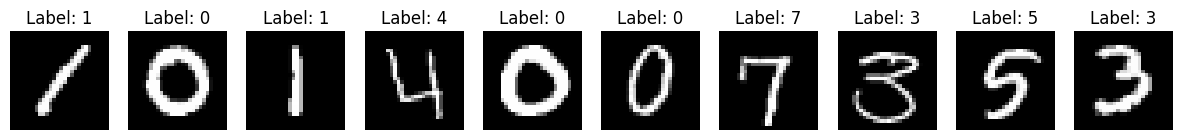

In [18]:
# Plot the first 10 digit of teh dataset

sample_images = X.head(10).values  
sample_labels = y.head(10).values 

# Reshape and plot the images
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    # Reshape the flattened image to a 28x28 array (for MNIST)
    image_reshaped = image.reshape(28, 28)
    axes[i].imshow(image_reshaped, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [22]:
# split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# set up the nueral network model
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=1, activation="linear")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)                │     50,240 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 52,353 (204.50 KB)

 Trainable params: 52,353 (204.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True))